# <span style=color:blue> Numerical Simulation Laboratory #
## <span style=color:blue> Exercise lecture 11 ##
### Mattia Nasi 11590A ###

In this notebook, my task is to perform machine learning regression on noisy data using a Neural Network (NN). My goal is to explore how the structure of the NN affects its ability to fit the data.

I consider a probabilistic process that generates labeled data $(x, y)$. Each data point is produced by the following relation:

$$ y_i = f(x_i) + \eta_i $$

where $f(x_i)$ is a fixed, possibly unknown function, and $\eta_i\$ represents a Gaussian, uncorrelated noise term characterized by:

$$
\langle \eta_i \rangle = 0, \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma.
$$

I refer to $f(x_i)$ as the true features underlying the data generation process.

To model the data and make predictions, I use a neural network with adjustable parameters (weights and biases). The set of functions that the NN is capable of representing defines the model class I am using for this regression task.

To train the neural network, I divide the dataset into two parts: a training set and a validation (or test) set. The training set is used to adjust the network's parameters, while the test set allows me to evaluate how well the trained network generalizes to new, unseen data. This separation is crucial because the goal of machine learning is not just to fit the training data but to make accurate predictions on previously unseen inputs.

To quantify how well the network is performing, I compare the predicted values $\{y_j^{\mathrm{pred}}\}$ on the test set to the actual target values $\{y_j\}$. A commonly used metric for this purpose is the mean squared error (MSE):

$$
MSE = \frac{1}{N_{\mathrm{test}}} \sum_{j=1}^{N_{\mathrm{test}}} (y_j^{\mathrm{pred}} - y_j)^2.
$$

Finally, I aim to gain a qualitative understanding of the NN's performance by plotting its predictions alongside the training and validation data.


## <span style=color:red> 11.1 ##

I start with the simplest case, a linear fit: 
$$ f(x)=2x+1 $$
In the plots below i explore how this simple NN, composed of only 1 layer, responds to the modification of certain features such as the number of epochs, the training set size and the noise magnitude. 

To do so i will compare both the validation loss training loss.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

m = 2  # slope
q = 1  # intercept

def generate_data(n_train, sigma):
    x_train = np.random.uniform(-1, 1, n_train)
    y_train = np.random.normal(m * x_train + q, sigma)

    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_valid = np.random.normal(m * x_valid + q, sigma)

    return x_train, y_train, x_valid, y_valid

def train_and_evaluate(x_train, y_train, x_valid, y_valid, epochs=30, batch_size=32):
    model = Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(
        x=x_train, y=y_train,
        batch_size=batch_size,
        epochs=epochs,
        shuffle=True,
        validation_data=(x_valid, y_valid),
        verbose=0  # suppress output
    )

    return history.history['loss'], history.history['val_loss']

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-13 11:48:17.454400: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-06-13 11:48:17.454429: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-06-13 11:48:17.454437: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-06-13 11:48:17.454693: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-13 11:48:17.454714: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow d

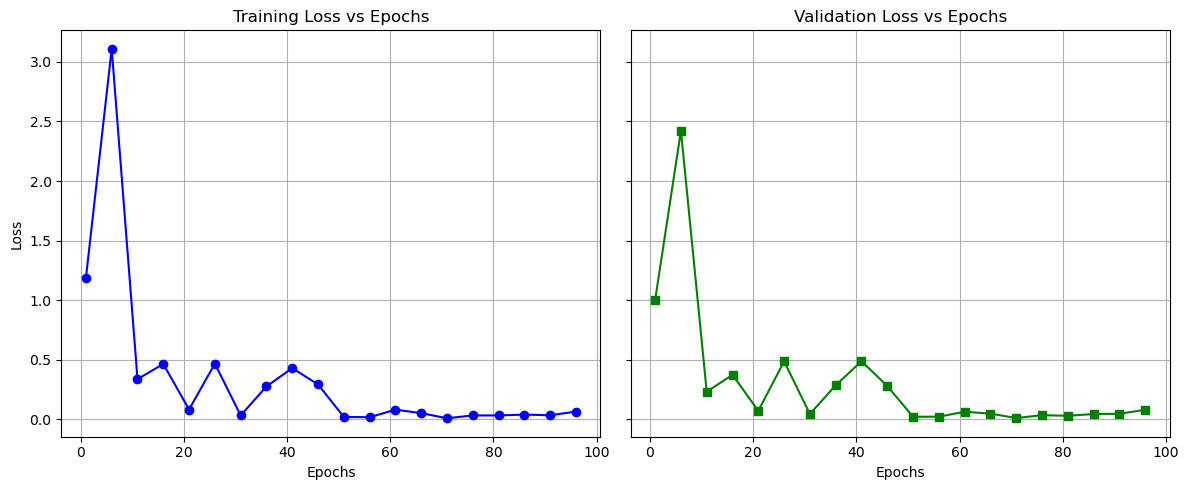

In [6]:
epoch_range = range(1, 101, 5)
final_train_losses = []
final_val_losses = []

for e in epoch_range:
    x_train, y_train, x_valid, y_valid = generate_data(n_train=100, sigma=0.1)
    train_loss, val_loss = train_and_evaluate(x_train, y_train, x_valid, y_valid, epochs=e)
    
    final_train_losses.append(train_loss[-1])
    final_val_losses.append(val_loss[-1])

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].plot(epoch_range, final_train_losses, marker='o', color='blue')
axs[0].set_title("Training Loss vs Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].grid(True)

axs[1].plot(epoch_range, final_val_losses, marker='s', color='green')
axs[1].set_title("Validation Loss vs Epochs")
axs[1].set_xlabel("Epochs")
axs[1].grid(True)

plt.tight_layout()
plt.show()

2025-06-13 11:49:20.036761: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


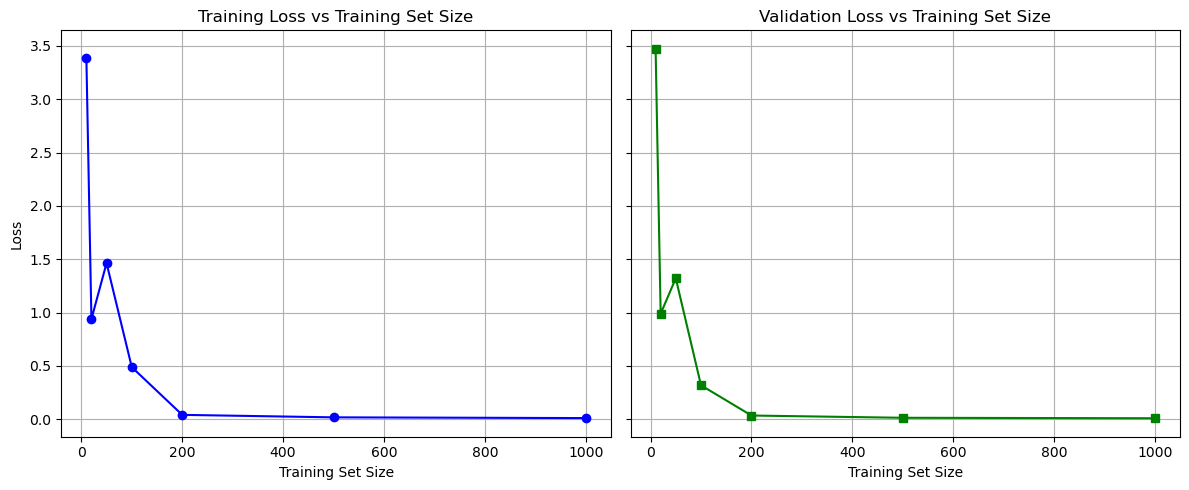

In [7]:
train_sizes = [10, 20, 50, 100, 200, 500, 1000]
final_train_losses = []
final_val_losses = []

for size in train_sizes:
    x_train, y_train, x_valid, y_valid = generate_data(n_train=size, sigma=0.1)
    train_loss, val_loss = train_and_evaluate(x_train, y_train, x_valid, y_valid, epochs=30)
    
    final_train_losses.append(train_loss[-1])
    final_val_losses.append(val_loss[-1])

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].plot(train_sizes, final_train_losses, marker='o', color='blue')
axs[0].set_title("Training Loss vs Training Set Size")
axs[0].set_xlabel("Training Set Size")
axs[0].set_ylabel("Loss")
axs[0].grid(True)

axs[1].plot(train_sizes, final_val_losses, marker='s', color='green')
axs[1].set_title("Validation Loss vs Training Set Size")
axs[1].set_xlabel("Training Set Size")
axs[1].grid(True)

plt.tight_layout()
plt.show()

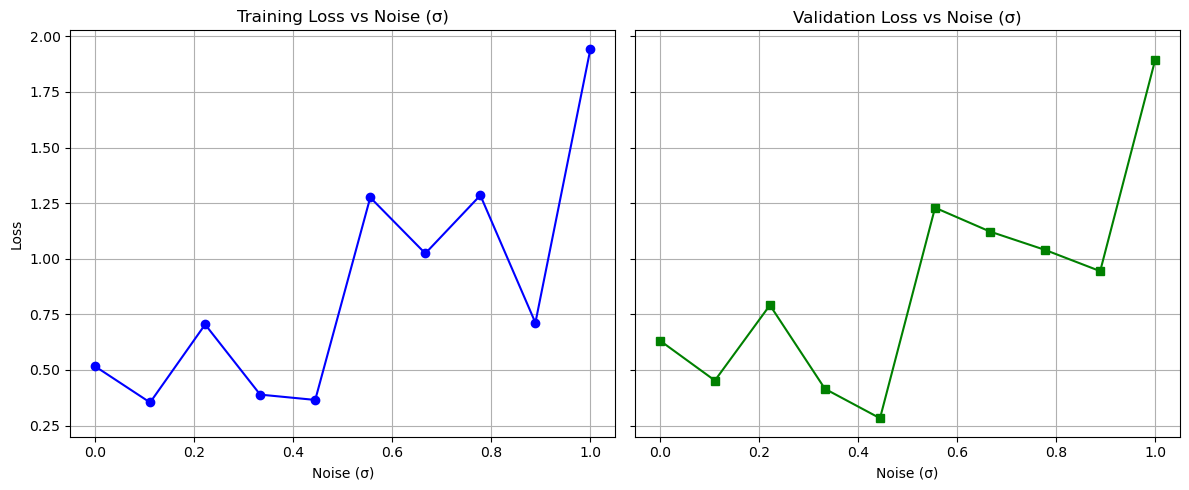

In [8]:
sigma_values = np.linspace(0, 1, 10)
final_train_losses = []
final_val_losses = []

for sigma in sigma_values:
    x_train, y_train, x_valid, y_valid = generate_data(n_train=100, sigma=sigma)
    train_loss, val_loss = train_and_evaluate(x_train, y_train, x_valid, y_valid, epochs=30)
    final_train_losses.append(train_loss[-1])
    final_val_losses.append(val_loss[-1])

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].plot(sigma_values, final_train_losses, marker='o', color='blue')
axs[0].set_title("Training Loss vs Noise (σ)")
axs[0].set_xlabel("Noise (σ)")
axs[0].set_ylabel("Loss")
axs[0].grid(True)

axs[1].plot(sigma_values, final_val_losses, marker='s', color='green')
axs[1].set_title("Validation Loss vs Noise (σ)")
axs[1].set_xlabel("Noise (σ)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


As expected from the above pictures the best behavior is obtained with the largest number of epochs, a sufficiently big training dataset and a small noise. The number of epochs and train set size plots both reach a plateau suggesting that the performance cannot be endlessely increased by simply traninig forever on an enourmous dataset as expected. The last piece of information is that when the noise starts to grow, the pattern recognitions becomes difficult leading to a worse performance.

## <span style=color:red> 11.2 ##

In this exercise i will try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Here i used the same $0.1$ noise as learned before but increased the training set dimension and the epochs number, this because with less data and training experience the NN failed to reproduce the boundary behaviors of the polynomial, this causes the training time to increase, to limit it I adopted an early stopping criteria that exits the training phase if the loss is not improving over 10 consecutive iterations (within a certain $\delta = 10^{-5}$.

The NN structure i adopted is rather simple, i noticed that for a task that easy having more layers and neurons does not produce better results so sticking with the minimum needed is the obious choice.

The MSE as loss function and SGD as optimizer work well in this context, shifting to a more complex optimizer like Adam (a more accurate and tunable version of the stochastic gradient descent) only caused an increase in training time with no tangible fitting capacity improvement.

Last is the activation function i only tried the below implemented ReLU for every layer, because I am performing a regression there is no need to apply a different function to the last layer for e.g normalize the outputs as probabilities.

In [29]:
b = 4
m1 = -3
m2 = -2
m3 = 3

np.random.seed(0)
x_train_2 = np.random.uniform(-1, 1, 10000)
x_valid_2 = np.random.uniform(-1, 1, 2000)
x_valid_2.sort()
y_target_2 = b + m1 * x_valid_2 + m2 * (x_valid_2)**2 + m3 * (x_valid_2)**3 

sigma_2 = 0.1 # noise standard deviation, for the moment it is absent
y_train_2 = np.random.normal(b + m1 * x_train_2 + m2 * (x_train_2)**2 + m3 * (x_train_2)**3, sigma_2) # actual measures from which we want to guess regression parameters
y_valid_2 = np.random.normal(b + m1 * x_valid_2 + m2 * (x_valid_2)**2 + m3 * (x_valid_2)**3 , sigma_2)

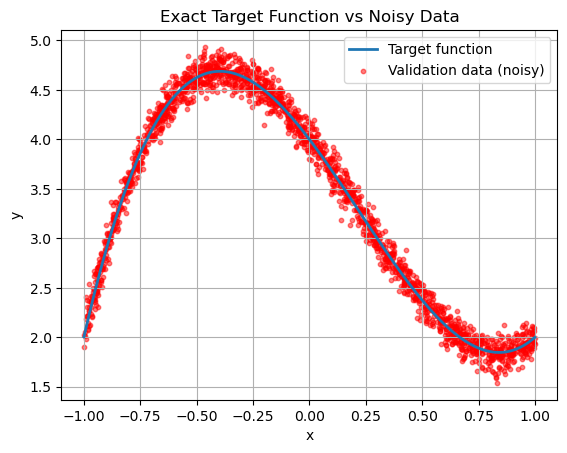

In [37]:
x_valid_sorted_2 = np.sort(x_valid_2)
y_target_sorted_2 = b + m1 * x_valid_sorted_2 + m2 * x_valid_sorted_2**2 + m3 * x_valid_sorted_2**3

plt.plot(x_valid_sorted_2, y_target_sorted_2, label='Target function', linewidth=2)
plt.scatter(x_valid_2, y_valid_2, color='red', s=10, alpha=0.5, label='Validation data (noisy)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exact Target Function vs Noisy Data")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=10,          
    min_delta=1e-5,       
    restore_best_weights=True 
)

model = Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(x=x_train_2, y=y_train_2, 
          batch_size=32, epochs=100,
          shuffle=True, 
          callbacks=[early_stop],
          validation_data=(x_valid_2, y_valid_2))

Epoch 1/100


2025-06-13 11:52:49.504490: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 7.4538 - mse: 7.4538 - val_loss: 0.3979 - val_mse: 0.3979
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2600 - mse: 0.2600 - val_loss: 0.0702 - val_mse: 0.0702
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/ste

In [49]:
score = model.evaluate(x_valid_2, y_valid_2, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - mse: 0.0107 

Test loss: 0.010474339127540588
Test accuracy: 0.010474339127540588


In [51]:
score = model.evaluate(x_valid_2, y_target_2, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4465e-04 - mse: 1.4465e-04 

Test loss: 0.0003853050002362579
Test accuracy: 0.0003853050002362579


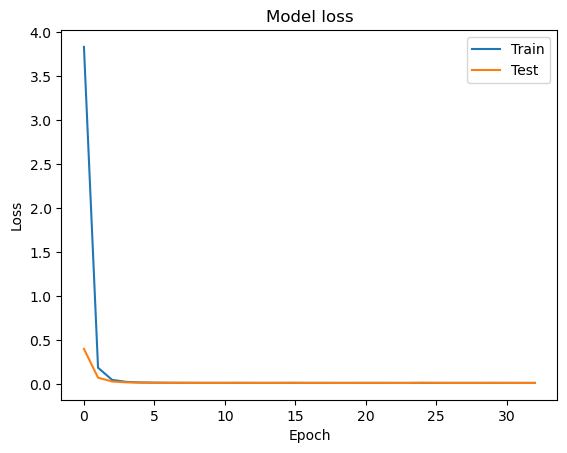

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


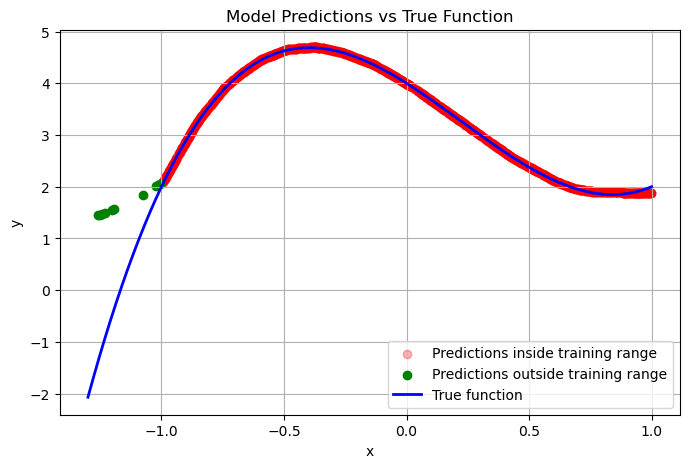

In [57]:
def f(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

# Points inside training interval
x_predicted = np.random.uniform(-1, 1, 2000)
y_predicted = model.predict(x_predicted).flatten()

# Points outside training interval
x_predicted_out = np.random.uniform(-1.3, -1, 10)
y_predicted_out = model.predict(x_predicted_out).flatten()

# True function values for validation points (or finely spaced points for smooth curve)
x_valid = np.linspace(-1.3, 1, 300)
y_true = f(x_valid)

plt.figure(figsize=(8,5))

plt.scatter(x_predicted, y_predicted, color='red', alpha=0.3, label='Predictions inside training range')
plt.scatter(x_predicted_out, y_predicted_out, color='green', label='Predictions outside training range')
plt.plot(x_valid, y_true, color='blue', linewidth=2, label='True function')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions vs True Function')
plt.legend()
plt.grid(True)
plt.show()

As said above when early stopping is introduced the NN becomes unable to account for the boundaries and fails to reproduce the function in those limits, if the training is left running for 100 epochs he result would be of a nearly perfect fit in the whole interval.

In this picture is also shown what happens when the NN tries to precict something out of the training space (the interval $[-1,1]$), as expected it fails, that is because the NN recognize a pattern without knowing where it comes from so it predicts the new points based on the what it learned not on a real basis.

## <span style=color:red> 11.3 ##

In this last exercise i will try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

To account for the higher complexity i extended the NN infrastructure adding two more layers but left the optimizer, loss function and activation functions unchanged since they performed well. The early stopping condition is the same as above.

In [63]:
x_t = np.random.uniform(-3./2., 3./2., size=(10000,2)) 
x_v = np.random.uniform(-3./2., 3./2., size=(2000,2)) 
y_tar = np.sin(x_t[:,0]**2+x_t[:,1]**2)

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_t = np.random.normal(np.sin(x_t[:,0]**2+x_t[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_v = np.random.normal(np.sin(x_v[:,0]**2+x_v[:,1]**2), sigma)

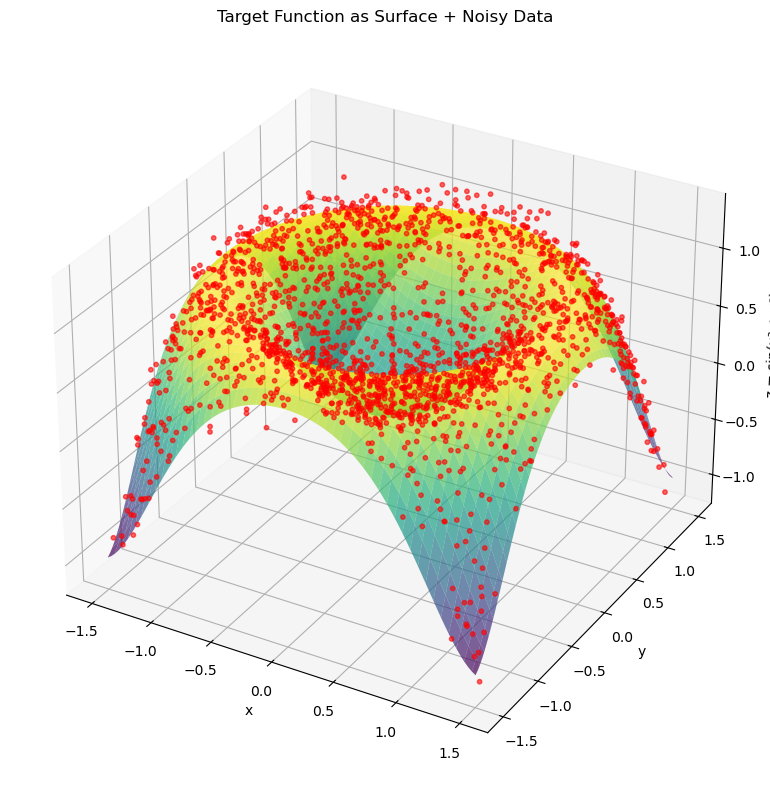

In [65]:
grid_x, grid_y = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_z = np.sin(grid_x**2 + grid_y**2)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie continua (funzione target)
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.7, edgecolor='none', label='Target function')

# Scatter dati di training
#ax.scatter(x_t[:, 0], x_t[:, 1], y_t, color='blue', s=10, alpha=0.5, label='Training data')

# Scatter dati di validazione
ax.scatter(x_v[:, 0], x_v[:, 1], y_v, color='red', s=10, alpha=0.6, label='Validation data')

# Etichette
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z = sin(x² + y²)')
ax.set_title('Target Function as Surface + Noisy Data')
plt.tight_layout()

In [67]:

model1 = Sequential()
model1.add(Dense(128, input_shape=(2,), activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1,))

model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history1 = model1.fit(
    x=x_t, y=y_t,
    batch_size=32,
    epochs=100,
    shuffle=True,
    callbacks=[early_stop],
    validation_data=(x_v, y_v)
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1215 - mse: 0.1215 - val_loss: 0.1143 - val_mse: 0.1143
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1084 - mse: 0.1084 - val_loss: 0.1073 - val_mse: 0.1073
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1045 - mse: 0.1045 - val_loss: 0.0999 - val_mse: 0.0999
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1009 - mse: 0.1009 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0912 - mse: 0.0912 - val_loss: 0.0819 - val_mse: 0.0819
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0821 - mse: 0.0821 - val_loss: 0.0726 - val_mse: 0.0726
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0717 - mse: 0.0717 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0629 - mse: 0.0629 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/

In [78]:
score1 = model1.evaluate(x_v, y_v, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - mse: 0.0107 

Test loss: 0.0003853050002362579
Test accuracy: 0.0003853050002362579


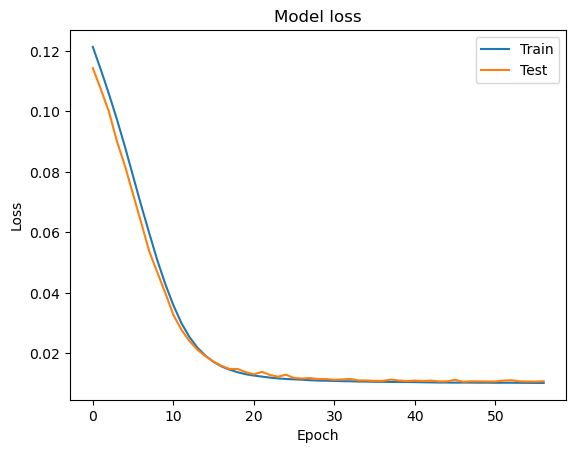

In [80]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


2025-06-13 12:01:52.707802: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


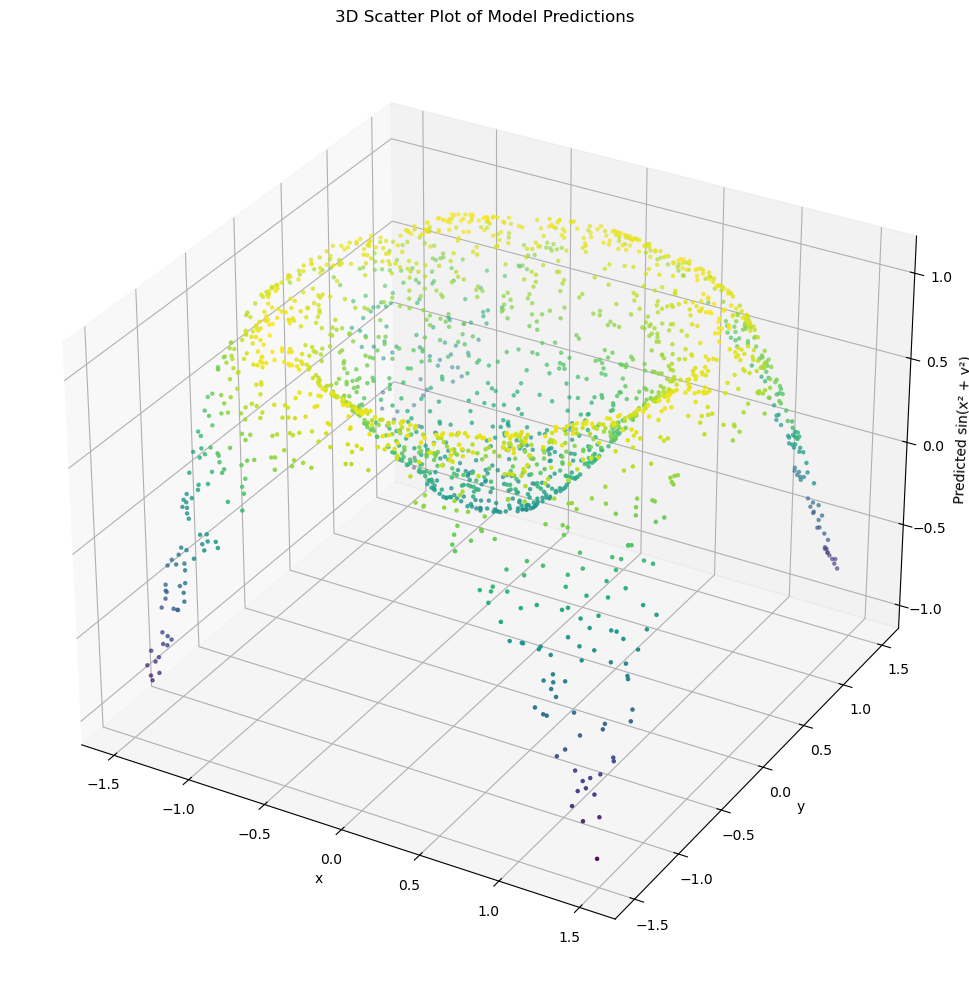

In [82]:
x_p = np.random.uniform(-3./2., 3./2., size=(2000,2))
y_p = model1.predict(x_p)

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter points: x, y, prediction
ax.scatter(x_p[:, 0], x_p[:, 1], y_p.flatten(), c=y_p.flatten(), cmap='viridis', s=5)

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Predicted sin(x² + y²)')
ax.set_title('3D Scatter Plot of Model Predictions')

plt.tight_layout()
plt.show()

As shown in this picture the model accurately reproduces the function. If I tried to evaluate something out of the training range the behavior would be the same as the 1D scenario for the exact same reasons.